In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [20]:
carPrice = pd.read_csv("CarPrice_Assignment.csv")
carPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [34]:
carPrice.shape

(205, 26)

### Categorização

transformar variáveis categoricas para numéricas

In [21]:
# Transformar label de categoriaca para numerica
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
le.fit(carPrice.CarName)
carPrice.CarName = le.transform(carPrice.CarName)

le.fit(carPrice.fueltype)
carPrice.fueltype = le.transform(carPrice.fueltype)

le.fit(carPrice.aspiration)
carPrice.aspiration = le.transform(carPrice.aspiration)

le.fit(carPrice.doornumber)
carPrice.doornumber = le.transform(carPrice.doornumber)


le.fit(carPrice.carbody)
carPrice.carbody = le.transform(carPrice.carbody)

le.fit(carPrice.drivewheel)
carPrice.drivewheel = le.transform(carPrice.drivewheel)


le.fit(carPrice.enginelocation)
carPrice.enginelocation = le.transform(carPrice.enginelocation)

le.fit(carPrice.fuelsystem)
carPrice.fuelsystem = le.transform(carPrice.fuelsystem)

In [23]:
carPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


### Análise Exploratoria

<AxesSubplot:xlabel='price', ylabel='Count'>

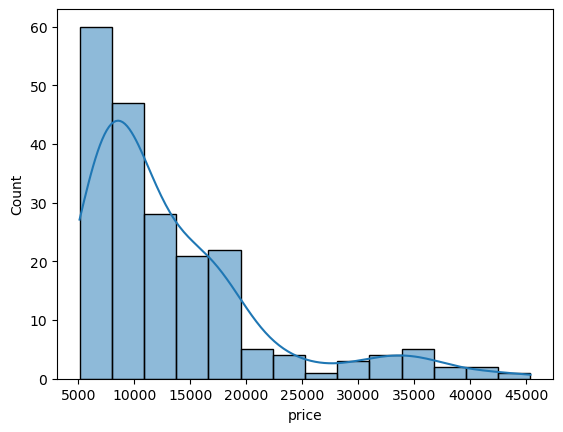

In [24]:
sns.histplot(carPrice, x="price", kde=True) # Não tem Nomal

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

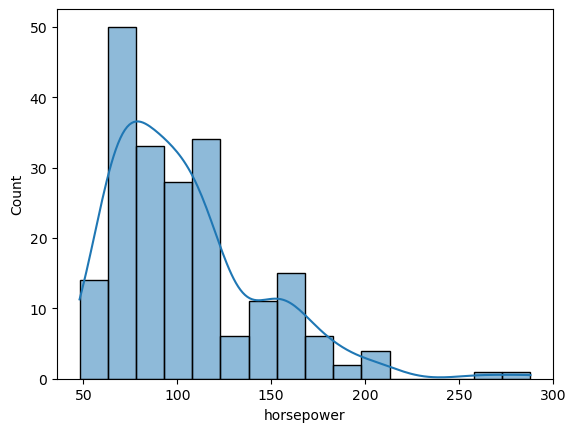

In [25]:
sns.histplot(carPrice, x="horsepower", kde=True) 

<AxesSubplot:xlabel='wheelbase', ylabel='Count'>

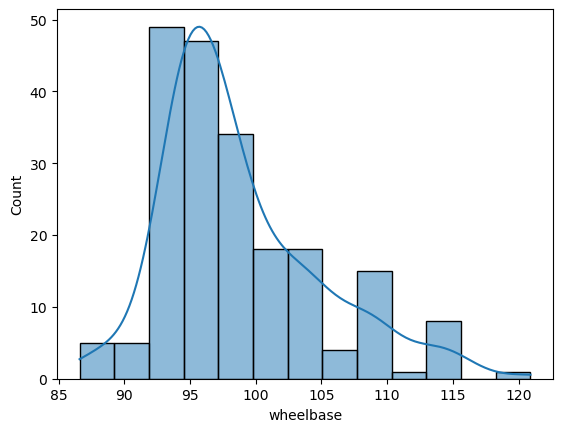

In [26]:
sns.histplot(carPrice, x="wheelbase", kde=True) 

In [30]:
carPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int32  
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int32  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    int32  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [31]:
carPrice.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,77.209756,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,...,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,41.014583,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,44.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,80.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,115.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,146.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [33]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols = carPrice.select_dtypes(include=[np.number])

scaler = MinMaxScaler()  
carPrice_norm = pd.DataFrame(scaler.fit_transform(numeric_cols), 
                             index=numeric_cols.index, 
                             columns=numeric_cols.columns)

In [35]:
carPrice_norm.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.000000,1.0,0.013699,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.004902,1.0,0.020548,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.009804,0.6,0.006849,1.0,0.0,1.0,0.50,1.0,0.0,0.230321,...,0.343396,0.714286,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.014706,0.8,0.027397,1.0,0.0,0.0,0.75,0.5,0.0,0.384840,...,0.181132,0.714286,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.019608,0.8,0.034247,1.0,0.0,0.0,0.75,0.0,0.0,0.373178,...,0.283019,0.714286,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142


In [36]:
carPrice_norm.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.500000,0.566829,0.528834,0.902439,0.180488,0.439024,0.653659,0.663415,0.014634,0.354419,...,0.248707,0.464808,0.564111,0.564483,0.196409,0.233821,0.398009,0.339431,0.388190,0.202540
std,0.290797,0.249061,0.280922,0.297446,0.385535,0.497483,0.214770,0.278085,0.120377,0.175562,...,0.157142,0.287601,0.193460,0.149332,0.248253,0.164767,0.194688,0.181726,0.181222,0.198323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.400000,0.301370,1.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.230321,...,0.135849,0.142857,0.435714,0.495238,0.100000,0.091667,0.265306,0.166667,0.236842,0.066283
50%,0.500000,0.600000,0.547945,1.000000,0.000000,0.000000,0.750000,0.500000,0.000000,0.303207,...,0.222642,0.714286,0.550000,0.580952,0.125000,0.195833,0.428571,0.305556,0.368421,0.128519
75%,0.750000,0.800000,0.787671,1.000000,0.000000,1.000000,0.750000,1.000000,0.000000,0.460641,...,0.301887,0.714286,0.742857,0.638095,0.150000,0.283333,0.551020,0.472222,0.473684,0.282632
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Análise de P Value - Backward - retirar os maiores P-VAlues > 0.05 ou 5%

In [37]:
import statsmodels.formula.api as smf

In [38]:
print(carPrice_norm.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


In [40]:
function = "price~fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg"
model = smf.ols(formula=function, data=carPrice_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     67.04
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           2.14e-73
Time:                        15:34:23   Log-Likelihood:                 258.04
No. Observations:                 205   AIC:                            -474.1
Df Residuals:                     184   BIC:                            -404.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1637      0.195  

In [41]:
function = "price~fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+fuelsystem+boreratio+stroke+peakrpm"
model = smf.ols(formula=function, data=carPrice_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     95.94
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           4.11e-78
Time:                        15:35:22   Log-Likelihood:                 255.30
No. Observations:                 205   AIC:                            -480.6
Df Residuals:                     190   BIC:                            -430.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0936      0.050     -1.

In [44]:
function = "price~drivewheel+enginelocation+carwidth+curbweight+enginesize+boreratio+stroke+peakrpm"
model = smf.ols(formula=function, data=carPrice_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     164.5
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           1.21e-82
Time:                        15:36:54   Log-Likelihood:                 250.71
No. Observations:                 205   AIC:                            -483.4
Df Residuals:                     196   BIC:                            -453.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.1438      0.032     -4.

### Treinar o Modelo

In [45]:
x = carPrice_norm[["drivewheel", "enginelocation","carwidth","curbweight", "enginesize","boreratio","stroke", "peakrpm"]]
y = carPrice_norm[["price"]]

In [46]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.2, random_state=42) 
lr = LinearRegression() #inicializa o Linear Regression

lr.fit(x_treino, y_treino)

LinearRegression()

In [47]:
r_sq = lr.score(x_treino,y_treino)
print(r_sq) # R-Quadrado

0.8829484728150286


In [48]:
y_pred_treino = lr.predict(x_treino)
print("MAE:", metrics.mean_absolute_error(y_treino, y_pred_treino))
print("MSE:", metrics.mean_squared_error(y_treino, y_pred_treino))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino)))

MAE: 0.04891853065161895
MSE: 0.004302064531765285
RMSE: 0.06559012526108854


In [49]:
lr.fit(x_teste, y_teste)

LinearRegression()

In [50]:
y_pred_teste = lr.predict(x_teste)

In [51]:
y_pred_teste = lr.predict(x_teste)
print("MAE:", metrics.mean_absolute_error(y_teste, y_pred_teste))
print("MSE:", metrics.mean_squared_error(y_teste, y_pred_teste))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste)))

MAE: 0.05345076793304207
MSE: 0.006176871601900577
RMSE: 0.0785930760429987
